<a href="https://colab.research.google.com/github/javier-jaime/House_Move/blob/main/Montecarlo_with_Python_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Montecarlo Examples

The problem is from Douglas W. Hubbard book “How to measure anything".


You are considering leasing a machine for some manufacturing process. The one-year lease costs you $400,000, and you cannot cancel early. You wonder whether the annual production level and the savings in maintenance, labor, and raw materials are high enough to justify leasing the machine.

From your human experts, you got the following ranges of variables (note that all ranges have 90% confidence interval and values are normally distributed):

maintenance savings: 10−20 USD per unit

labor savings: -2–8 USD per unit

raw material savings: 3−9 USD per unit

production level: 15,000–35000 units per year

annual lease: $400000

the annual savings = (maintenance savings + labor savings + raw material savings) * production level

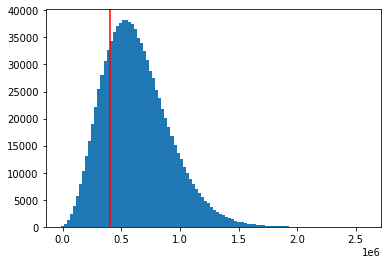

In [ ]:
# is the probability of failure (annual savings smaller than the cost of the machine)
_90_conf_interval = 3.29
maintenance = norm(loc = (20 + 10) / 2, scale = (20 - 10) / _90_conf_interval)
labor = norm(loc = (8 + -2) / 2, scale = (8 - -2) / _90_conf_interval)
raw_material = norm(loc = (9 + 3) / 2, scale = (9 - 3) / _90_conf_interval)
prod_level = norm(loc = (35000 + 15000) / 2, scale = (35000 - 15000) / _90_conf_interval)
number_of_simulations = 1000000
maintenance_results = maintenance.rvs(number_of_simulations, random_state=42)
labor_results = labor.rvs(number_of_simulations)
raw_materials_results = raw_material.rvs(number_of_simulations, random_state=42)
prod_level_results = prod_level.rvs(number_of_simulations, random_state=42)
data = pd.DataFrame({
    "maintenance_savings_per_unit": maintenance_results,
    "labor_savings_per_unit": labor_results,
    "raw_materials_savings_per_unit": raw_materials_results,
    "production_level": prod_level_results
})
data["total_savings"] = (data.maintenance_savings_per_unit + data.labor_savings_per_unit + data.raw_materials_savings_per_unit) * data.production_level

# Plot the distribution, red line is the profitability threshold
plt.hist(data.total_savings, bins = 100)
plt.axvline(x = 400000, c = "r")
plt.show()

In [ ]:
# Count the failures
data[data["total_savings"] < 400000].count()

maintenance_savings_per_unit      218851
labor_savings_per_unit            218851
raw_materials_savings_per_unit    218851
production_level                  218851
total_savings                     218851
dtype: int64

In [ ]:
# Percentage of Probability of losing money
data[data["total_savings"] < 400000].count()["total_savings"] / 10000

21.8851

##  Budget for sales commissions example

In this example, the commission is a result of this formula:

Commission Amount = Actual Sales * Commission Rate

The commission rate is based on this Percent To Plan table:

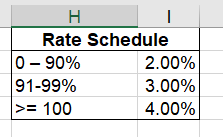

In [ ]:
# Building a Python Model

import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')

In [ ]:
# Define the variables for the Percent to target based on historical results
avg = 1
std_dev = .1
num_reps = 500
num_simulations = 1000

# Generate the list of percentages with Random number generator from numpy
pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

# Show first 10 items
pct_to_target[0:10]

array([1.16, 0.95, 0.8 , 1.02, 1.01, 1.07, 0.95, 1.11, 1.19, 1.11])

In [ ]:
# Use a uniform distribution but assign lower probability for some of the values
sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)

In [ ]:
# create a pandas data frame for our two input distributions
df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                               'Sales_Target': sales_target})
# Back into the actual sales amount
df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']
df.head()

,Pct_To_Target,Sales_Target,Sales
0,1.16,100000,116000.0
1,0.95,300000,285000.0
2,0.80,100000,80000.0
3,1.02,200000,204000.0
4,1.01,400000,404000.0


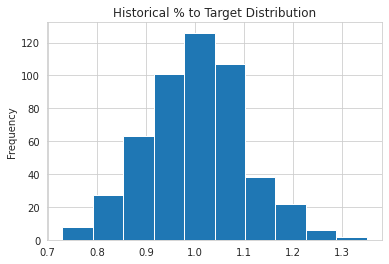

In [ ]:
# Simple histogram to confirm distribution looks as expected
df['Pct_To_Target'].plot(kind='hist', title='Historical % to Target Distribution')

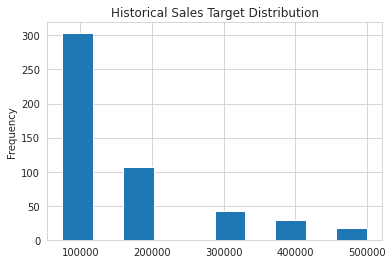

In [ ]:
# Look at the sales target distribution
df['Sales_Target'].plot(kind='hist', title='Historical Sales Target Distribution')

In [ ]:
# Function to map our Pct_To_Target to the commission rate

def calc_commission_rate(x):
    """ Return the commission rate based on the table:
    0-90% = 2%
    91-99% = 3%
    >= 100 = 4%
    """
    if x <= .90:
        return .02
    if x <= .99:
        return .03
    else:
        return .04

In [ ]:
# Create commission rate and multiply it by sales to calculate the commissions

df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']
df.head()

,Pct_To_Target,Sales_Target,Sales,Commission_Rate,Commission_Amount
0,1.16,100000,116000.0,0.04,4640.0
1,0.95,300000,285000.0,0.03,8550.0
2,0.80,100000,80000.0,0.02,1600.0
3,1.02,200000,204000.0,0.04,8160.0
4,1.01,400000,404000.0,0.04,16160.0


In [ ]:
# Totals and stats
print(df['Sales'].sum(), df['Commission_Amount'].sum(), df['Sales_Target'].sum())
df.describe()

81539000.0 2817305.0 81150000


,Pct_To_Target,Sales_Target,Sales,Commission_Rate,Commission_Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1.000400,162300.000000,163078.000000,0.033660,5634.610000
std,0.100245,112099.699756,116347.525368,0.007491,4543.886953
min,0.730000,75000.000000,54750.000000,0.020000,1095.000000
25%,0.940000,75000.000000,81937.500000,0.030000,2872.500000
50%,1.000000,100000.000000,103000.000000,0.040000,4040.000000
75%,1.060000,200000.000000,210000.000000,0.040000,8160.000000
max,1.350000,500000.000000,620000.000000,0.040000,24800.000000


### Show Full Example of the simulation

In [ ]:
%%time
# Define a list to keep all the results from each simulation that we want to analyze
all_stats = []

# Loop through many simulations
for i in range(num_simulations):

    # Choose random inputs for the sales targets and percent to target
    sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
    pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

    # Build the dataframe based on the inputs and number of reps
    df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                                   'Sales_Target': sales_target})

    # Back into the sales number using the percent to target rate
    df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

    # Determine the commissions rate and calculate it
    df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
    df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

    # We want to track sales,commission amounts and sales targets over all the simulations
    all_stats.append([df['Sales'].sum().round(0),
                      df['Commission_Amount'].sum().round(0),
                      df['Sales_Target'].sum().round(0)])

CPU times: user 3.04 s, sys: 18.6 ms, total: 3.06 s
Wall time: 3.06 s


In [ ]:
# create a results dataframe from all_stats
results_df = pd.DataFrame.from_records(all_stats, columns=['Sales',
                                                           'Commission_Amount',
                                                           'Sales_Target'])
results_df.describe().style.format('{:,}')

,Sales,Commission_Amount,Sales_Target
count,"1,000.0","1,000.0","1,000.0"
mean,"83,871,461.0","2,865,479.415","83,845,600.0"
std,"2,723,474.681692639","103,016.33529062009","2,680,680.0322745414"
min,"75,462,750.0","2,551,648.0","74,925,000.0"
25%,"81,970,625.0","2,797,580.25","82,068,750.0"
50%,"83,935,625.0","2,863,964.0","83,900,000.0"
75%,"85,698,000.0","2,933,639.5","85,656,250.0"
max,"92,436,250.0","3,211,612.0","92,975,000.0"


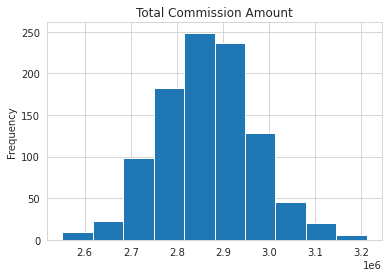

In [ ]:
results_df['Commission_Amount'].plot(kind='hist', title="Total Commission Amount")

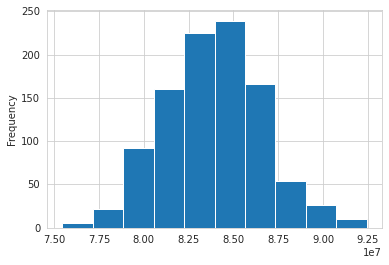

In [ ]:
results_df['Sales'].plot(kind='hist')